In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/boscolio/spotify_data/main/spotify.csv', index_col=[0])
print(df.shape)
df.head()

(157994, 13)


,name,artists,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
0,Main Title - Gone With the Wind,Max Steiner,0.680,0.170,0.430,0.854000,0.454545,0.459,0.810649,0.32,0.0357,0.500191,0.171
1,Seven Come Eleven (feat. Benny Goodman & Charl...,"Benny Goodman Sextet, Benny Goodman, Charlie C...",0.727,0.703,0.720,0.016000,0.090909,0.185,0.831843,0.27,0.0292,0.475091,0.823
2,Let's Do It (with Eddie Heywood & His Orchestr...,"Billie Holiday, Eddie Heywood",0.983,0.543,0.182,0.000171,0.454545,0.258,0.714577,0.21,0.0537,0.584427,0.597
3,9:20 Special,Count Basie,0.871,0.513,0.333,0.089200,0.181818,0.297,0.712898,0.25,0.1010,0.815849,0.876
4,"Final Speech (From ""The Great Dictator"")",Charlie Chaplin,0.885,0.721,0.383,0.000000,0.181818,0.503,0.809033,0.24,0.6590,0.510885,0.629


In [ ]:
import pickle
from sklearn.neighbors import NearestNeighbors

def pickle_model(df):
    df = df.copy()
    model = NearestNeighbors(n_neighbors=11)
    model.fit(df[df.columns[2:13]])

    knn_file = open('model_knn.pkl', 'wb') # create file
    pickle.dump(model, knn_file) # dumps model into file
   
    return model, knn_file

In [ ]:
model, pickle_file = pickle_model(df)

def NN_predict(track, artist=0): 

    knn_file = open('model_knn.pkl', 'rb') # read only version
    model_knn = pickle.load(knn_file) # testing loading byte str

    # Assigned input matches to a series
    obs = df.index[df['name'] == track]
    series = df.iloc[obs, 2:13].to_numpy()

    # Query model based on input
    neighbors = model_knn.kneighbors(series)
    new_obs = neighbors[1][artist][1:11]
   
    # Unused for now
    #song = list(df_new.loc[new_obs, 'name'])
    #artists = list(df_new.loc[new_obs, 'artists'])

    # Display artist and spotify id of all songs that match the input
    artist_list = df.iloc[obs, 1]

    # Using spotify track id to return dataframe of results
    df_nn = df.loc[new_obs]

    names = df_nn[['name', 'artists']]
    names_dict = names.to_dict(orient='records')
    
    #print(artist_list)
    return names_dict, artist_list, df_nn

In [ ]:
'''
names_dict is a dictionary comprised of the song names and artists 
of the nearest neighbor results.

artist_list is list of all artists that have a song by that name.  By default 
the function returns the first result.  
'''

In [18]:
results, artists, df_predict = NN_predict('Float On', artist=1)

The first artist is shown by default
try artist=1 and so on to see other results


In [19]:
results

[{'artists': 'Los Tigres Del Norte', 'name': 'El Tamal'},
 {'artists': 'Charles Wright & The Watts 103rd Street Rhythm Band',
  'name': 'Express Yourself'},
 {'artists': 'Adolescents Orquesta', 'name': 'Arrepentida'},
 {'artists': 'The Irish Rovers', 'name': 'Star of the County Down'},
 {'artists': 'Salomn Robles Y Sus Legendarios', 'name': 'El Campanero'},
 {'artists': 'Virginia Lopez', 'name': 'Cariñito Azucarado'},
 {'artists': 'Los Tigres Del Norte', 'name': 'A Quien No Le Gusta Eso'},
 {'artists': 'Los Originales De San Juan', 'name': 'Perro Malagradecido'},
 {'artists': 'Frankie Ruiz', 'name': 'Mi Libertad'},
 {'artists': 'Paco Barrn y sus Norteos Clan', 'name': 'Tarjeta Roja'}]

In [20]:
artists

12848                    Modest Mouse
28128    TDre, Delux, Cali Life Style
43272                    The Floaters
Name: artists, dtype: object

In [21]:
df_predict

,name,artists,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
75743,El Tamal,Los Tigres Del Norte,0.417,0.770,0.535,0.000014,0.636364,0.338,0.766660,0.44,0.1270,0.459773,0.892
6108,Express Yourself,Charles Wright & The Watts 103rd Street Rhythm...,0.480,0.789,0.683,0.000000,0.727273,0.350,0.802664,0.59,0.0860,0.379090,0.882
60407,Arrepentida,Adolescents Orquesta,0.454,0.737,0.614,0.000000,0.727273,0.285,0.755036,0.53,0.0542,0.455547,0.895
27722,Star of the County Down,The Irish Rovers,0.451,0.695,0.656,0.000000,0.636364,0.274,0.786019,0.52,0.0324,0.428752,0.902
90603,El Campanero,Salomn Robles Y Sus Legendarios,0.495,0.836,0.652,0.000000,0.727273,0.342,0.860285,0.38,0.1080,0.388851,0.905
121369,Cariñito Azucarado,Virginia Lopez,0.398,0.790,0.592,0.000167,0.727273,0.321,0.738203,0.46,0.0506,0.513225,0.908
89011,A Quien No Le Gusta Eso,Los Tigres Del Norte,0.506,0.786,0.597,0.000006,0.636364,0.284,0.756871,0.33,0.1770,0.318151,0.887
77077,Perro Malagradecido,Los Originales De San Juan,0.346,0.704,0.734,0.000000,0.636364,0.368,0.786521,0.44,0.1000,0.479280,0.919
123254,Mi Libertad,Frankie Ruiz,0.421,0.813,0.699,0.000002,0.727273,0.252,0.820485,0.38,0.0465,0.383209,0.937
91222,Tarjeta Roja,Paco Barrn y sus Norteos Clan,0.390,0.789,0.753,0.000068,0.636364,0.337,0.834541,0.41,0.0390,0.346314,0.966


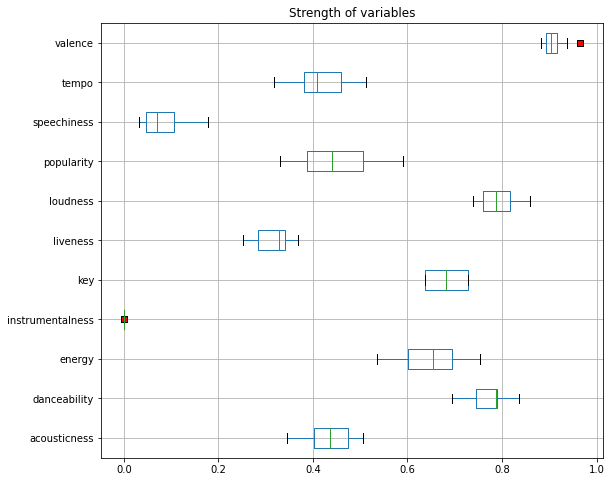

In [ ]:
import matplotlib.pyplot as plt

cols = ['acousticness',	'danceability', 'energy', 'instrumentalness', 'key',
        'liveness', 'loudness',	'popularity', 'speechiness', 'tempo', 'valence']
 
red_square = dict(markerfacecolor='r', marker='s')
df_predict.boxplot(column=cols, vert=False, flierprops=red_square, figsize=(9,8))
plt.title('Strength of variables')
plt.show()